# R number 

*a toy to see the link between recurent calculation in generations and exponential function, that can be fitted to the experimental data*

## Recurent part 1

- the the `get_curve1` does a recurent calculation with R
   - R is the infamous `R` nuber
   
The graph demonstrates the exponential rise, that stems from calculations from generation to generation.




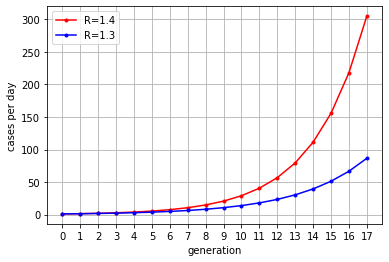

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit


# recurent calculation: generation[n+1] =  generation[n] *R
#   N0 - number of cases in day 1
#   T0 - day 1
GENERATIONS = 18 # generations
R = 1.4     # R

def get_curve1(R):
    """
    recursively calculate number of new cases
    """
    global GENERATIONS
    x=np.arange(GENERATIONS)
    y = []
    for i in range(len(x)):
        if i>0:
            y.append( R * y[i-1] )
        else:
            y.append(1)
    return x,y


# FIRST SHOT - LIMITS
x0,y0 = get_curve1(R )
x1,y1 = get_curve1(R-0.1)

plt.plot(x0,y0,"r.-", label="R=1.4")
plt.plot(x1,y1,"b.-", label="R=1.3")

#plt.yscale("log")
plt.grid()
plt.xticks(range(18))
plt.xlabel("generation")
plt.ylabel("cases per day")

plt.legend()

## Recurent part 2


*to use a general picture for generations, we introduce a some more variables and compare with real data*

- we get some **real** data (Fridays in September in Czech Republic # https://www.novinky.cz/koronavirus/clanek/prehledne-jak-je-na-tom-vas-kraj-v-poctu-testovanych-a-nakazenych-40316485
)
- the  `get_curve` does a recurent calculation with R
   - R is the infamous `R` nuber
   - **Added now is**
   - $F$ a scaling factor for one generation (in days)
   - $N_0$ is some initial number of infected
   - $T_0$ is the day of the year, the time when $N_0$ is infected 
   

The plot (now in **LOG** scale that is better for the exponential behaviour) shows DATA and two **ad hoc** estimations   

Factor $F$ for real data is correlated with $R$, as shown in the correlation matrix at the end of analytical part.


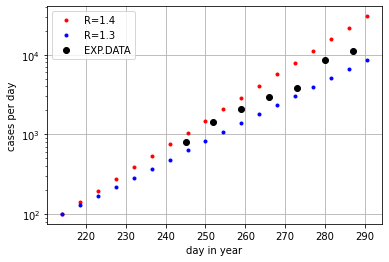

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit

#1.9. UT 245.  #8.9.  15 22 29
#248   PA 4. 11  18  25.9  2.10 9.10

# experimental data from  weekly 4.10 - 9.10
# https://www.novinky.cz/koronavirus/clanek/prehledne-jak-je-na-tom-vas-kraj-v-poctu-testovanych-a-nakazenych-40316485
xe = [245, 252,  259,  266,  273, 280,  287]
ye = [797, 1443, 2108, 2947, 3794, 8616, 11104]

# recurent calculation: generation[n+1] =  generation[n] *R
#   N0 - number of cases in day 1
#   T0 - day 1
#   F  - period for 1 generation in days
POINTS = 18 # generations
R = 1.4     # R
F = 4.5     # contagious days
N0 = 100    # infected  in day 1
T0 = 214    # day 1

def get_curve(R,F,N0,T0):
    """
    recursively calculate number of new cases
    """
    global POINTS
    x=np.arange(POINTS)
    x= F*x + T0
    y = []
    for i in range(len(x)):
        if i>0:
            y.append( R * y[i-1] )
        else:
            y.append(N0)
    return x,y


# FIRST SHOT - LIMITS
x0,y0 = get_curve(R  ,F,     N0,T0)
x1,y1 = get_curve(R-0.1,F,  N0,T0)

plt.plot(x0,y0,"r.", label="R=1.4")
plt.plot(x1,y1,"b.", label="R=1.3")
plt.plot(xe,ye,"ko", label="EXP.DATA")

plt.yscale("log")
plt.grid()
plt.xlabel("day in year")
plt.ylabel("cases per day")

plt.legend()

## Analytical part

Recurent model is fine. But there is a great correspondence with analytical form, that describes the exponential behavior. We have simple tools that work great with analytical functions.

Here is shown the link between **recurent form**  and **exponential function**, including the parameters `R` and time connected parameters $t_0$, $F$, $N_0$

- `gen_fun` is just an exponential $N_0 R^{1/F(t-t_0)}$
- `lq` is a least squares function, that is used for a standard $\chi^2$ minimization
- we fix $F$ - the time of the generation as an arbitrary number 5.5 days
- we fix $N_0$ to 1, as number of cases at $t_0$

$F$ is correlated with $R$

<ValueView of Minuit at 2f92770>
  R: 1.4103777197546403
  F: 5.5
  N0: 1.0
  T0: 137.48437052119652
R = 1.410 +/- 0.004
F = 5.500 +/- 0.055
N0 = 1.000 +/- 0.010
T0 = 137.484 +/- 1.174


<ipython-input-21-fd6e5e33fa2d>:26: InitialParamWarning: errordef is not given, defaults to 1.
  m = Minuit(lq, R=1.3,F=5.5,N0=1,T0=220, fix_N0=True, fix_F=True)


,R,T0
R,1.00,1.00
T0,1.00,1.00


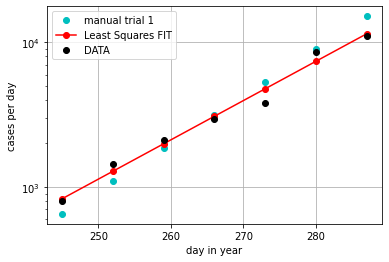

In [21]:
def gen_fun(x, R=1.3,F=3.5,N0=100,T0=220):
    """
    exponential function that corresponds to recurasive calculation
    """
    x2 = 1/F*(x - T0)
    y = N0 * R ** (x2)
    return y


def lq(R=1.3,F=3.5,N0=100,T0=220):
    """
    Least squares - compare data with gen_fun result
    """
    gen_fun_v = np.vectorize(gen_fun)
    ye2 = gen_fun_v(xe,R,F,N0,T0)
    chi2=(ye-ye2)**2
    return chi2.sum()**0.5
    
# FIRST SHOT - LIMITS
#x0,y0 = get_curve(R  ,F,     N0,T0)
#x1,y1 = get_curve(R-0.08,F,  N0,T0)

gen_fun_v = np.vectorize(gen_fun)
ye2 = gen_fun_v(xe)

m = Minuit(lq, R=1.3,F=5.5,N0=1,T0=220, fix_N0=True, fix_F=True) 

m.migrad() # finds minimum of least_squares function
m.hesse()  # computes errors 

print(m.values)

plt.plot(xe,ye2,"co", label="manual trial 1")

plt.plot(xe, gen_fun_v(xe, *m.values.values()), 'r-o', label="Least Squares FIT")

plt.plot(xe,ye,"ko", label="DATA")

plt.yscale("log")
plt.grid()
plt.legend()
plt.xlabel("day in year")
plt.ylabel("cases per day")

for p in m.parameters:
    print("{} = {:.3f} +/- {:.3f}".format(p, m.values[p], m.errors[p]))
m.matrix(correlation=True)    

Simple model with $F$ fixed to 5.5 gives $R$=1.41

More advanced models must use detailed propagation analysis through the regions and age groups.